In [1]:
CUDA_LAUNCH_BLOCKING=1
import torch
import matplotlib.pyplot as plt
import os
from torchvision import transforms
import os.path
import numpy as np
from PIL import Image
from typing import List, Union, Tuple, Any

In [2]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from mpl_toolkits.axes_grid1 import ImageGrid

def check_mkdir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        
def create_frames_from_video(video_location, save_folder ,name_prefix='img', extension='jpg'):
    # Read the video from specified path
    cam = cv2.VideoCapture(video_location)
    currentframe = 1
    while(True):

        # reading from frame
        ret,frame = cam.read()
        if ret:
            # if video is still left continue creating images
            name= os.path.join(save_folder, f'{name_prefix}_{currentframe:05d}.{extension}')

            # writing the extracted images
            cv2.imwrite(name, frame)

            # increasing counter so that it will
            # show how many frames are created
            currentframe += 1
        else:
            break

    cam.release()
    cv2.destroyAllWindows()
    return currentframe

def plot_video(rows, cols, frame_list, plot_width, plot_height, title: str):
    fig = plt.figure(figsize=(plot_width, plot_height))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )

    for index, (ax, im) in enumerate(zip(grid, frame_list)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(index)
    plt.suptitle(title)
    plt.show()
    
def denormalize(video_tensor):
    """
    Undoes mean/standard deviation normalization, zero to one scaling,
    and channel rearrangement for a batch of images.
    args:
        video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    """
    inverse_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()

class ShiftWithChannelTensor:
    def __call__(self, data):
        return data.permute(1, 0, 2, 3).contiguous()

    def __repr__(self):
        return self.__class__.__name__ + '()'

In [3]:
'''import os
import glob
from os.path import normpath, basename
from sklearn.model_selection import train_test_split

DATA_PATH = 'dataset/activities'#dataset
# create dictionary of activities

list_activities= os.listdir(DATA_PATH)
list_dict= {}
for index,activity in enumerate(list_activities):
    list_dict[activity] = index
    
# create a note 
with open('label_notes.txt', 'w') as f:
    for key,value in list_dict.items():
        f.write(f"{key}: {value}")
        f.write('\n')

# create list of data
all_x =[]
all_y = []
for path, subdirs, files in os.walk(DATA_PATH):
    for name in files:
        all_x.append(os.path.join(path, name))
        all_y.append(list_dict[basename(normpath(path))])

print(f"Currently have {len(all_x)} video data...")  

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=42, stratify=all_y)

# generate image for train & test
check_mkdir('dataset/train')#dataset/train
check_mkdir('dataset/test')#dataset/test

for key,value in list_dict.items():
    check_mkdir(os.path.join('dataset/train',str(value)))
    check_mkdir(os.path.join('dataset/test',str(value)))

with open('dataset/train/annotations.txt', 'w') as f:
    for index,video in enumerate(X_train):
        vid_in_folder = len(os.listdir(os.path.join('dataset/train',str(y_train[index]))))
        path_folder = os.path.join('dataset/train',str(y_train[index]),str(vid_in_folder+1).zfill(5))
        check_mkdir(path_folder)
        # parse video into frame
        last_frame = create_frames_from_video(video,path_folder)
        # create note
        f.write(f'{y_train[index]}/{str(vid_in_folder+1).zfill(5)} 1 {last_frame-1} {y_train[index]}')
        f.write('\n')
        
with open('dataset/test/annotations.txt', 'w') as f:
    for index,video in enumerate(X_test):
        vid_in_folder = len(os.listdir(os.path.join('dataset/test',str(y_test[index]))))
        path_folder = os.path.join('dataset/test',str(y_test[index]),str(vid_in_folder+1).zfill(5))
        check_mkdir(path_folder)
        # parse video into frame
        last_frame = create_frames_from_video(video,path_folder)
        # create note
        f.write(f'{y_test[index]}/{str(vid_in_folder+1).zfill(5)} 1 {last_frame-1} {y_test[index]}')
        f.write('\n')'''

'import os\nimport glob\nfrom os.path import normpath, basename\nfrom sklearn.model_selection import train_test_split\n\nDATA_PATH = \'dataset/activities\'#dataset\n# create dictionary of activities\n\nlist_activities= os.listdir(DATA_PATH)\nlist_dict= {}\nfor index,activity in enumerate(list_activities):\n    list_dict[activity] = index\n    \n# create a note \nwith open(\'label_notes.txt\', \'w\') as f:\n    for key,value in list_dict.items():\n        f.write(f"{key}: {value}")\n        f.write(\'\n\')\n\n# create list of data\nall_x =[]\nall_y = []\nfor path, subdirs, files in os.walk(DATA_PATH):\n    for name in files:\n        all_x.append(os.path.join(path, name))\n        all_y.append(list_dict[basename(normpath(path))])\n\nprint(f"Currently have {len(all_x)} video data...")  \n\n# split to train and test\nX_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=42, stratify=all_y)\n\n# generate image for train & test\ncheck_mkdir(\'dataset/

In [3]:
'''MobilenetV2 in PyTorch.
See the paper "MobileNetV2: Inverted Residuals and Linear Bottlenecks" for more details.
'''
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable




def conv_bn(inp, oup, stride):
    return nn.Sequential(
        nn.Conv3d(inp, oup, kernel_size=3, stride=stride, padding=(1,1,1), bias=False),
        nn.BatchNorm3d(oup),
        nn.ReLU6(inplace=True)
    )


def conv_1x1x1_bn(inp, oup):
    return nn.Sequential(
        nn.Conv3d(inp, oup, 1, 1, 0, bias=False),
        nn.BatchNorm3d(oup),
        nn.ReLU6(inplace=True)
    )


class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        super(InvertedResidual, self).__init__()
        self.stride = stride

        hidden_dim = round(inp * expand_ratio)
        self.use_res_connect = self.stride == (1,1,1) and inp == oup

        if expand_ratio == 1:
            self.conv = nn.Sequential(
                # dw
                nn.Conv3d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm3d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv3d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm3d(oup),
            )
        else:
            self.conv = nn.Sequential(
                # pw
                nn.Conv3d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm3d(hidden_dim),
                nn.ReLU6(inplace=True),
                # dw
                nn.Conv3d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm3d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv3d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm3d(oup),
            )

    def forward(self, x):
        if self.use_res_connect:
            return x + self.conv(x)
        else:
            return self.conv(x)


class MobileNetV2(nn.Module):
    def __init__(self, num_classes=1000, sample_size=224, width_mult=1.):
        super(MobileNetV2, self).__init__()
        block = InvertedResidual
        input_channel = 32
        last_channel = 1280
        interverted_residual_setting = [
            # t, c, n, s
            [1,  16, 1, (1,1,1)],
            [6,  24, 2, (2,2,2)],
            [6,  32, 3, (2,2,2)],
            [6,  64, 4, (2,2,2)],
            [6,  96, 3, (1,1,1)],
            [6, 160, 3, (2,2,2)],
            [6, 320, 1, (1,1,1)],
        ]

        # building first layer
        assert sample_size % 16 == 0.
        input_channel = int(input_channel * width_mult)
        self.last_channel = int(last_channel * width_mult) if width_mult > 1.0 else last_channel
        self.features = [conv_bn(3, input_channel, (1,2,2))]
        # building inverted residual blocks
        for t, c, n, s in interverted_residual_setting:
            output_channel = int(c * width_mult)
            for i in range(n):
                stride = s if i == 0 else (1,1,1)
                self.features.append(block(input_channel, output_channel, stride, expand_ratio=t))
                input_channel = output_channel
        # building last several layers
        self.features.append(conv_1x1x1_bn(input_channel, self.last_channel))
        # make it nn.Sequential
        self.features = nn.Sequential(*self.features)

        # building classifier
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(self.last_channel, num_classes),
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = F.avg_pool3d(x, x.data.size()[-3:])
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.kernel_size[2] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm3d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                n = m.weight.size(1)
                m.weight.data.normal_(0, 0.01)
                m.bias.data.zero_()


def get_fine_tuning_parameters(model, ft_portion):
    if ft_portion == "complete":
        return model.parameters()

    elif ft_portion == "last_layer":
        ft_module_names = []
        ft_module_names.append('classifier')

        parameters = []
        for k, v in model.named_parameters():
            for ft_module in ft_module_names:
                if ft_module in k:
                    parameters.append({'params': v})
                    break
            else:
                parameters.append({'params': v, 'lr': 0.0})
        return parameters

    else:
        raise ValueError("Unsupported ft_portion: 'complete' or 'last_layer' expected")
    
if __name__ == "__main__":
    model = MobileNetV2(num_classes=6, sample_size=112, width_mult=1.)
    print(model)

    input_var = torch.randn(8, 3, 16, 112, 112)
    output = model(input_var)
    print(output.shape)

MobileNetV2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 2, 2), padding=(1, 1, 1), bias=False)
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=32, bias=False)
        (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv3d(32, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
        (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv3d(16, 96, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
        (1): BatchNorm3d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2

torch.Size([8, 6])


In [4]:
class ImglistToTensor(torch.nn.Module):
    """
    Converts a list of PIL images in the range [0,255] to a torch.FloatTensor
    of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1].
    Can be used as first transform for ``VideoFrameDataset``.
    """
    @staticmethod
    def forward(img_list: List[Image.Image]) -> 'torch.Tensor[NUM_IMAGES, CHANNELS, HEIGHT, WIDTH]':
        """
        Converts each PIL image in a list to
        a torch Tensor and stacks them into
        a single tensor.

        Args:
            img_list: list of PIL images.
        Returns:
            tensor of size ``NUM_IMAGES x CHANNELS x HEIGHT x WIDTH``
            
        
        """
        #print(type(img_list))
        #print(img_list)
        #print(np.array(img_list).shape)
        return torch.stack([transforms.functional.to_tensor(pic) for pic in img_list])

In [5]:
import os
import os.path
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
from typing import List, Union, Tuple, Any


class VideoRecord(object):
    """
    Helper class for class VideoFrameDataset. This class
    represents a video sample's metadata.

    Args:
        root_datapath: the system path to the root folder
                       of the videos.
        row: A list with four or more elements where 1) The first
             element is the path to the video sample's frames excluding
             the root_datapath prefix 2) The  second element is the starting frame id of the video
             3) The third element is the inclusive ending frame id of the video
             4) The fourth element is the label index.
             5) any following elements are labels in the case of multi-label classification
    """
    def __init__(self, row, root_datapath):
        self._data = row
        self._path = os.path.join(root_datapath, row[0])


    @property
    def path(self) -> str:
        return self._path

    @property
    def num_frames(self) -> int:
        return self.end_frame - self.start_frame + 1  # +1 because end frame is inclusive
    @property
    def start_frame(self) -> int:
        return int(self._data[1])

    @property
    def end_frame(self) -> int:
        return int(self._data[2])

    @property
    def label(self) -> Union[int, List[int]]:
        # just one label_id
        if len(self._data) == 4:
            return int(self._data[3])
        # sample associated with multiple labels
        else:
            return [int(label_id) for label_id in self._data[3:]]

In [6]:
class VideoFrameDataset(torch.utils.data.Dataset):
  
    def __init__(self,
                 root_path: str,
                 annotationfile_path: str,
                 num_segments: int = 3,
                 frames_per_segment: int = 1,
                 imagefile_template: str='img_{:05d}.jpg',
                 transform = None,
                 test_mode: bool = False):
        super(VideoFrameDataset, self).__init__()

        self.root_path = root_path
        self.annotationfile_path = annotationfile_path
        self.num_segments = num_segments
        self.frames_per_segment = frames_per_segment
        self.imagefile_template = imagefile_template
        self.transform = transform
        self.test_mode = test_mode

        self._parse_annotationfile()
        self._sanity_check_samples()

    def _load_image(self, directory: str, idx: int) -> Image.Image:
        return Image.open(os.path.join(directory, self.imagefile_template.format(idx))).convert('RGB')

    def _parse_annotationfile(self):
        self.video_list = [VideoRecord(x.strip().split(), self.root_path) for x in open(self.annotationfile_path)]

    def _sanity_check_samples(self):
        for record in self.video_list:
            if record.num_frames <= 0 or record.start_frame == record.end_frame:
                print(f"\nDataset Warning: video {record.path} seems to have zero RGB frames on disk!\n")

            elif record.num_frames < (self.num_segments * self.frames_per_segment):
                print(f"\nDataset Warning: video {record.path} has {record.num_frames} frames "
                      f"but the dataloader is set up to load "
                      f"(num_segments={self.num_segments})*(frames_per_segment={self.frames_per_segment})"
                      f"={self.num_segments * self.frames_per_segment} frames. Dataloader will throw an "
                      f"error when trying to load this video.\n")

    def _get_start_indices(self, record: VideoRecord) -> 'np.ndarray[int]':
        """
        For each segment, choose a start index from where frames
        are to be loaded from.

        Args:
            record: VideoRecord denoting a video sample.
        Returns:
            List of indices of where the frames of each
            segment are to be loaded from.
        """
        # choose start indices that are perfectly evenly spread across the video frames.
        if self.test_mode:
            distance_between_indices = (record.num_frames - self.frames_per_segment + 1) / float(self.num_segments)

            start_indices = np.array([int(distance_between_indices / 2.0 + distance_between_indices * x)
                                      for x in range(self.num_segments)])
        # randomly sample start indices that are approximately evenly spread across the video frames.
        else:
            max_valid_start_index = (record.num_frames - self.frames_per_segment + 1) // self.num_segments

            start_indices = np.multiply(list(range(self.num_segments)), max_valid_start_index) + \
                      np.random.randint(max_valid_start_index, size=self.num_segments)

        return start_indices

    def __getitem__(self, idx: int) -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        For video with id idx, loads self.NUM_SEGMENTS * self.FRAMES_PER_SEGMENT
        frames from evenly chosen locations across the video.

        Args:
            idx: Video sample index.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """
        record: VideoRecord = self.video_list[idx]

        frame_start_indices: 'np.ndarray[int]' = self._get_start_indices(record)

        return self._get(record, frame_start_indices)

    def _get(self, record: VideoRecord, frame_start_indices: 'np.ndarray[int]') -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        Loads the frames of a video at the corresponding
        indices.

        Args:
            record: VideoRecord denoting a video sample.
            frame_start_indices: Indices from which to load consecutive frames from.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """

        frame_start_indices = frame_start_indices + record.start_frame
        images = list()

        # from each start_index, load self.frames_per_segment
        # consecutive frames
        for start_index in frame_start_indices:
            frame_index = int(start_index)

            # load self.frames_per_segment consecutive frames
            for _ in range(self.frames_per_segment):
                image = self._load_image(record.path, frame_index)
                images.append(image)

                if frame_index < record.end_frame:
                    frame_index += 1

        if self.transform is not None:
            images = self.transform(images)

        return images, record.label

    def __len__(self):
        return len(self.video_list)

In [7]:
from torchvision import transforms
def eval_preprocess(size):
    preprocess = transforms.Compose([
        ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        transforms.Resize(size),  # image batch, resize smaller edge to 299
        transforms.CenterCrop(size),  # image batch, center crop to square 299x299
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ShiftWithChannelTensor()
    ])
    return preprocess

def train_preprocess(size):
    train_preprocess = transforms.Compose([
        ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        transforms.Resize(size),  # image batch, resize smaller edge to 299
        transforms.RandomCrop(size),  # image batch, center crop to square 299x299
        transforms.RandomHorizontalFlip(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ShiftWithChannelTensor()
    ])
    return train_preprocess



In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

n_epochs= 80
train_on_gpu = True
size = 112

eval_preprocess = eval_preprocess(size)

train_preprocess = train_preprocess(size)

train_dataset = VideoFrameDataset(
    root_path='dataset/train',
    annotationfile_path='dataset/train/annotations.txt',
    num_segments=16,
    frames_per_segment=1,
    imagefile_template='img_{:05d}.jpg',
    transform=train_preprocess,
    test_mode=False
)
test_dataset = VideoFrameDataset(
    root_path='dataset/test',
    annotationfile_path='dataset/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)

train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)

test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)

model = MobileNetV2(num_classes=6, sample_size=size, width_mult=1.)
#model.load_state_dict(torch.load('pretrained/kinetics_mobilenetv2_1.0x_RGB_16_best.pth'))

if train_on_gpu:
    model = nn.DataParallel(model)
    model.cuda()
    print('train on gpu')
else:
    model.cpu()
    print('train on cpu')
    
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, 'min',patience=10,verbose=True,min_lr=1e-10)

valid_loss_min = np.Inf # track change in validation loss

epoch_train_loss =[]
epoch_val_loss =[]
for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    train_pred = np.array([],dtype='i')
    train_truth = np.array([],dtype='i')
    for data, target in train_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        train_pred = np.concatenate((train_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
        train_truth = np.concatenate((train_truth, target.clone().detach().cpu().numpy()))
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    y_pred = np.array([],dtype='i')
    y_truth = np.array([],dtype='i')
    print('validation')
    with torch.no_grad():
        for data, target in test_dataloader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
            y_truth = np.concatenate((y_truth, target.clone().detach().cpu().numpy()))
    
    # calculate average losses
    train_loss = train_loss/len(train_dataloader.sampler)
    valid_loss = valid_loss/len(test_dataloader.sampler)
    epoch_train_loss.append(train_loss)
    epoch_val_loss.append(valid_loss)
    
    trainacc=accuracy_score(train_truth, train_pred)
    acc = accuracy_score(y_truth, y_pred)
    rec = recall_score(y_truth, y_pred, average='macro')
    prec = precision_score(y_truth, y_pred, average='macro')
    f1 = f1_score(y_truth, y_pred, average='macro')
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining acc: {:.2f} \tValidation Loss: {:.6f} \tAccuracy: {:.2f} \tF1-Score: {:.2f}'.format(
    epoch, train_loss, trainacc, valid_loss, acc, f1))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.module.state_dict(), 'P3D63_Global_2.pt')
        valid_loss_min = valid_loss
    """
    wandb.log({
        'train_loss': train_loss,
        'val_loss': valid_loss,
        'accuracy': acc,
        'f1-score': f1,
        'recall': rec,
        'precission': prec,
    }, step=epoch) 
    """
    
    scheduler.step(valid_loss)

train on gpu
validation
Epoch: 1 	Training Loss: 1.614348 	Training acc: 0.30 	Validation Loss: 1.532102 	Accuracy: 0.38 	F1-Score: 0.31
Validation loss decreased (inf --> 1.532102).  Saving model ...
validation
Epoch: 2 	Training Loss: 1.297667 	Training acc: 0.48 	Validation Loss: 1.032824 	Accuracy: 0.59 	F1-Score: 0.51
Validation loss decreased (1.532102 --> 1.032824).  Saving model ...
validation
Epoch: 3 	Training Loss: 1.024721 	Training acc: 0.59 	Validation Loss: 0.804859 	Accuracy: 0.68 	F1-Score: 0.64
Validation loss decreased (1.032824 --> 0.804859).  Saving model ...
validation
Epoch: 4 	Training Loss: 0.843673 	Training acc: 0.67 	Validation Loss: 0.724085 	Accuracy: 0.72 	F1-Score: 0.70
Validation loss decreased (0.804859 --> 0.724085).  Saving model ...
validation
Epoch: 5 	Training Loss: 0.763242 	Training acc: 0.71 	Validation Loss: 0.649981 	Accuracy: 0.76 	F1-Score: 0.77
Validation loss decreased (0.724085 --> 0.649981).  Saving model ...
validation
Epoch: 6 	Traini

KeyboardInterrupt: 


Dataset Warning: video dataset/test\0/00025 has 31 frames but the dataloader is set up to load (num_segments=32)*(frames_per_segment=1)=32 frames. Dataloader will throw an error when trying to load this video.


Dataset Warning: video dataset/test\0/00052 has 31 frames but the dataloader is set up to load (num_segments=32)*(frames_per_segment=1)=32 frames. Dataloader will throw an error when trying to load this video.



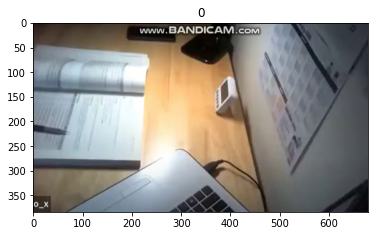

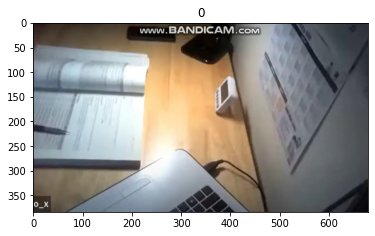

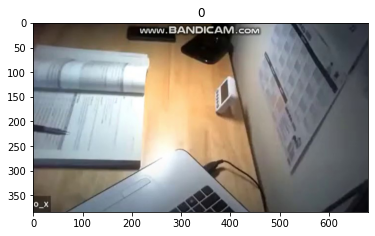

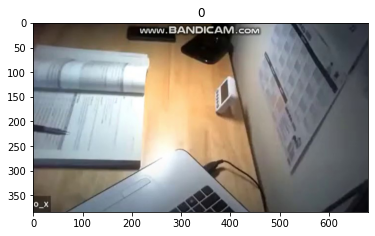

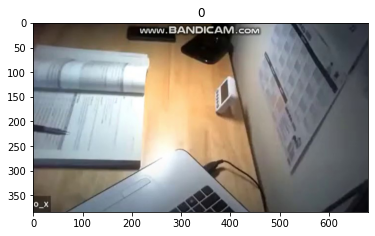

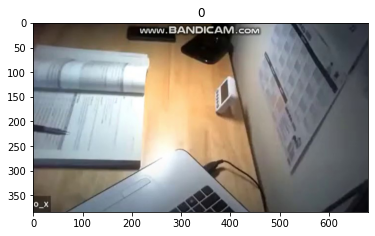

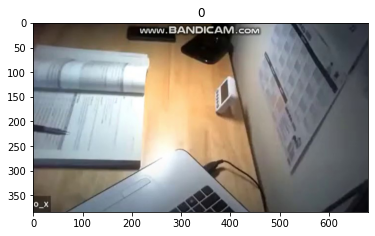

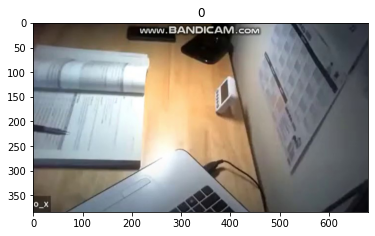

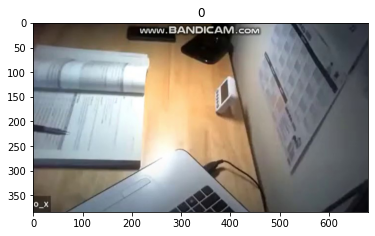

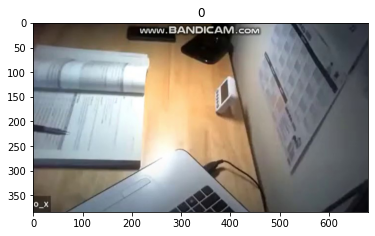

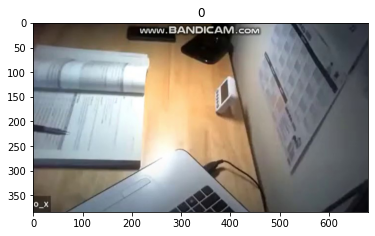

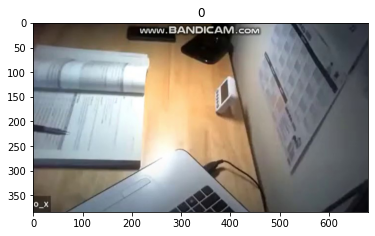

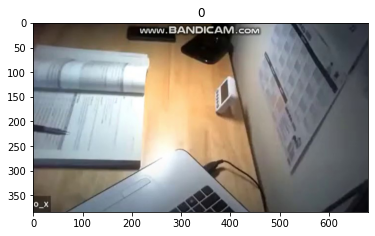

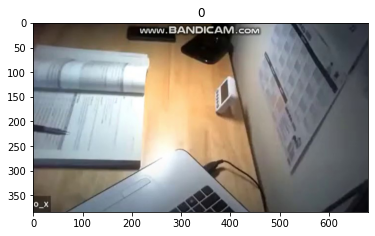

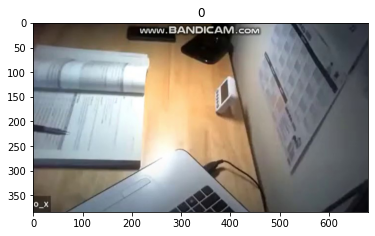

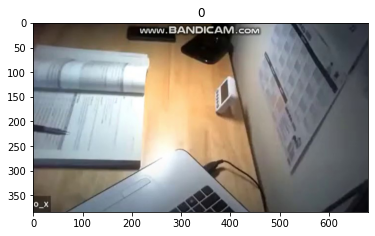

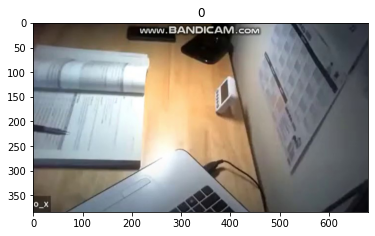

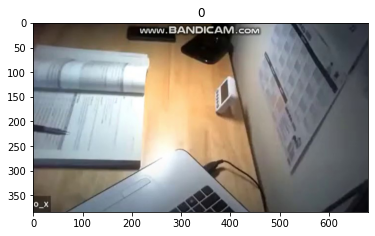

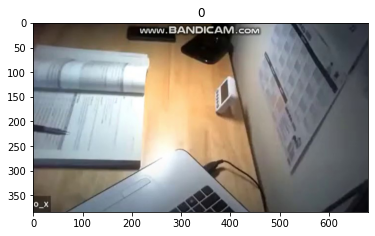

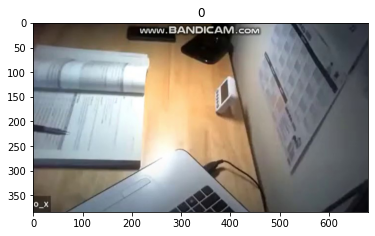

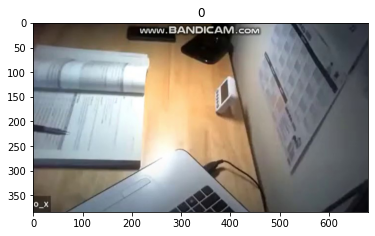

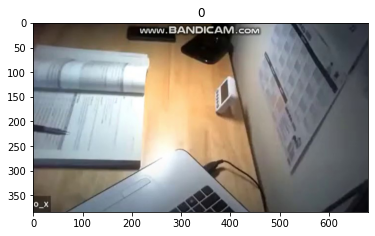

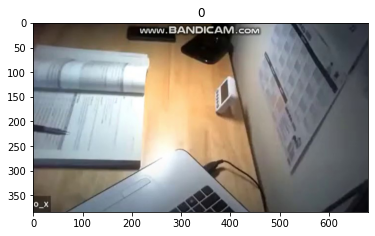

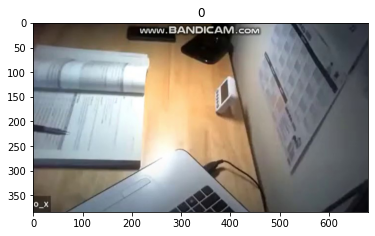

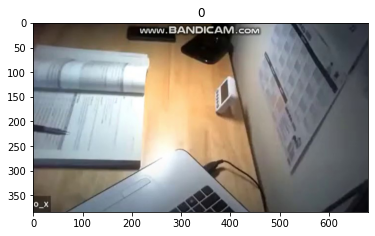

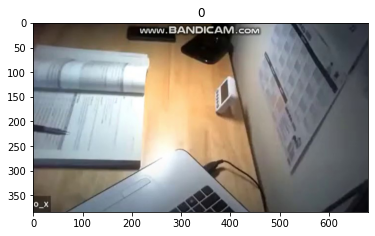

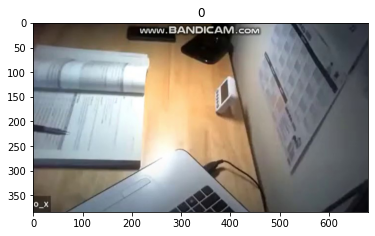

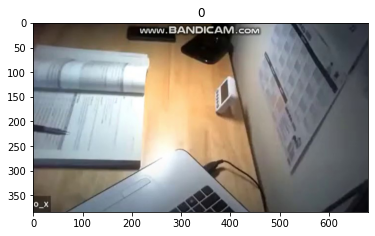

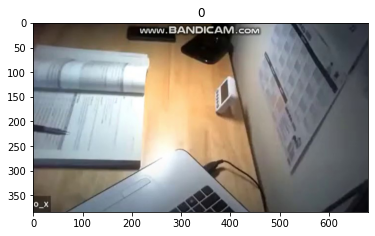

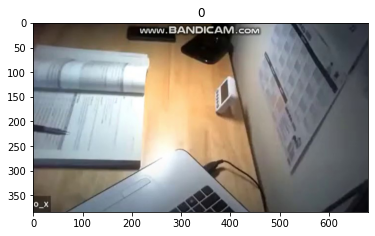

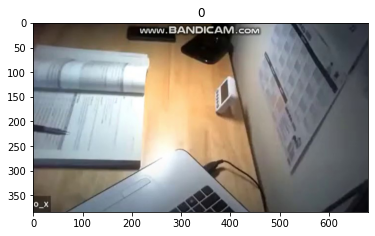

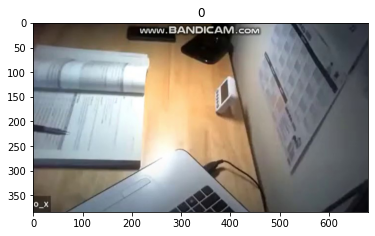

In [23]:
root = 'dataset/test'
annotation_file = os.path.join(root, 'annotations.txt')  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

""" DEMO 1 WITHOUT IMAGE TRANSFORMS """
dataset = VideoFrameDataset(
    root_path=root,
    annotationfile_path=annotation_file,
    num_segments=32,
    frames_per_segment=1,
    imagefile_template='img_{:05d}.jpg',
    #transform=eval_preprocess,
    test_mode=False
)


sample = dataset[0]  # take first sample of dataset 
frames = sample[0]   # list of PIL images
label = sample[1]    # integer label

for image in frames:
    plt.imshow(image)
    plt.title(label)
    plt.show()
    plt.pause(1)

In [ ]:
'''data = VideoFrameDataset(
    root_path='dataset/test',
    annotationfile_path='dataset/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)

samples = data[0]
frames = samples[0]
label = samples[1]
test_dataloader = torch.utils.data.DataLoader(
    dataset=data,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
sample = dataset[0]  # take first sample of dataset 
frames = sample[0]   # list of PIL images
label = sample[1]    # integer label


with torch.no_grad():
    #for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
    if train_on_gpu:
        datadata= data.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
#output = model(samples)
a,b=test_dataloader
'''

In [56]:
y_pred

array([1, 5, 0, 0, 0, 1, 3, 0, 5, 4, 1, 1, 1, 3, 5, 1, 0, 1, 3, 2, 3, 0,
       1, 5, 3, 1, 0, 5, 4, 0, 0, 5, 0, 0, 0, 4, 0, 3, 1, 3, 4, 2, 0, 4,
       0, 3, 0, 3, 0, 1, 1, 5, 4, 1, 1, 3, 5, 3, 3, 0, 3, 3, 1, 2, 3, 0,
       5, 3, 0, 1, 3, 0, 5, 3, 3, 3, 1, 1, 0, 2, 1, 1, 5, 5, 0, 5, 1, 0,
       5, 0, 0, 4, 2, 2, 5, 0, 2, 1, 5, 1, 2, 5, 0, 1, 1, 5, 1, 0, 3, 1,
       3, 0, 5, 5, 0, 3, 0, 3, 0, 2, 0, 5, 4, 5, 5, 1, 5, 0, 4, 0, 5, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 5, 1, 1, 3, 4, 0, 2, 0, 1, 5, 5, 5, 0, 3,
       5, 0, 0, 0, 1, 5, 5, 2, 3, 3, 0, 5, 1, 2, 1, 3, 5, 3, 3, 2, 5, 2,
       1, 0, 5, 2, 3, 4, 3, 3, 0, 2, 4, 0, 5, 3, 5, 0, 5, 0, 0, 0, 1, 5,
       0, 3, 0, 5, 3, 5, 1, 0, 1, 3, 5, 1, 4, 0, 1, 5, 1, 0, 3, 5, 3, 0,
       5, 4, 4, 2, 1, 1, 3, 0, 4, 2, 0, 0, 1, 4, 5, 2, 3, 0, 0, 3, 3, 4,
       0, 1, 1, 1, 5, 1, 2, 0, 5, 3, 1, 1, 1, 3, 2, 3, 0, 2, 3, 0, 0, 2,
       1, 3, 5, 5, 2, 3, 3, 1, 0, 0, 0, 1, 3, 2, 5, 3, 0, 3, 0, 1, 3, 1,
       0, 5, 1, 0, 3, 0, 1, 3, 5, 2, 2, 3, 2, 3, 2,

In [57]:
y_truth

array([1, 5, 4, 0, 0, 1, 3, 0, 5, 4, 1, 1, 1, 3, 5, 1, 0, 1, 3, 2, 3, 0,
       1, 5, 3, 1, 0, 5, 4, 0, 0, 5, 4, 0, 4, 4, 0, 3, 1, 3, 5, 2, 0, 4,
       0, 3, 0, 3, 0, 1, 1, 5, 4, 1, 1, 3, 5, 3, 3, 0, 3, 3, 1, 2, 3, 0,
       5, 3, 4, 1, 3, 0, 5, 3, 3, 3, 1, 1, 0, 2, 1, 1, 5, 5, 0, 5, 1, 0,
       5, 4, 0, 4, 2, 2, 5, 0, 2, 1, 5, 1, 2, 5, 0, 1, 1, 5, 1, 4, 3, 1,
       3, 0, 5, 5, 4, 3, 4, 3, 4, 2, 4, 5, 0, 5, 5, 1, 5, 0, 4, 0, 5, 0,
       4, 0, 0, 2, 5, 2, 1, 1, 5, 1, 1, 3, 4, 4, 2, 0, 1, 5, 5, 5, 4, 3,
       5, 0, 4, 4, 1, 5, 5, 2, 3, 3, 0, 5, 1, 5, 1, 3, 5, 3, 3, 2, 5, 5,
       1, 0, 5, 2, 3, 4, 3, 3, 0, 2, 5, 0, 5, 3, 5, 0, 5, 4, 0, 5, 1, 5,
       0, 3, 0, 5, 3, 5, 1, 0, 1, 3, 5, 1, 4, 0, 1, 5, 1, 3, 3, 5, 3, 4,
       5, 4, 4, 2, 1, 1, 3, 0, 4, 2, 0, 0, 1, 4, 5, 2, 3, 0, 0, 3, 3, 4,
       4, 1, 1, 1, 5, 1, 5, 0, 5, 3, 1, 1, 1, 3, 2, 3, 0, 2, 3, 0, 0, 2,
       1, 3, 5, 5, 2, 3, 3, 1, 4, 0, 0, 1, 3, 2, 5, 3, 0, 3, 0, 1, 3, 1,
       0, 5, 1, 0, 3, 3, 1, 3, 5, 2, 2, 3, 2, 3, 2,

# Confusion matrix

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_truth, y_pred)
print(cf)

[[111   1   0   0   2   0]
 [  2 109   0   1   0   0]
 [  0   0  41   1   0   2]
 [  3   0   0 105   2   0]
 [ 23   0   0   0  30   2]
 [  0   0  11   0   0  98]]


In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(train_truth, train_pred)
print(cf)

[[544   8   0   2  18   0]
 [ 10 544   0   5   2   2]
 [  2   1 190   3   1  11]
 [  6   4   1 544   0   5]
 [ 33   1   0   2 221   3]
 [  0   1  11   4   2 542]]


# 모델 구조

In [52]:
print(model)

DataParallel(
  (module): MobileNetV2(
    (features): Sequential(
      (0): Sequential(
        (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 2, 2), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=32, bias=False)
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
          (3): Conv3d(32, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
          (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv3d(16, 96, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
          (1): BatchNorm3d(96, eps=1e-05,

# 모델 파라미터&크기

In [59]:
count = 0
for name, param in model.named_parameters():
    count+=1
    if count==1:
        print(param.size()) 
        print(name)

torch.Size([32, 3, 3, 3, 3])
module.features.0.0.weight


In [61]:
from torchsummary import summary as summary
summary(model, (3,3,3,3)) # (model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1          [-1, 32, 3, 2, 2]           2,592
       BatchNorm3d-2          [-1, 32, 3, 2, 2]              64
             ReLU6-3          [-1, 32, 3, 2, 2]               0
            Conv3d-4          [-1, 32, 3, 2, 2]             864
       BatchNorm3d-5          [-1, 32, 3, 2, 2]              64
             ReLU6-6          [-1, 32, 3, 2, 2]               0
            Conv3d-7          [-1, 16, 3, 2, 2]             512
       BatchNorm3d-8          [-1, 16, 3, 2, 2]              32
  InvertedResidual-9          [-1, 16, 3, 2, 2]               0
           Conv3d-10          [-1, 96, 3, 2, 2]           1,536
      BatchNorm3d-11          [-1, 96, 3, 2, 2]             192
            ReLU6-12          [-1, 96, 3, 2, 2]               0
           Conv3d-13          [-1, 96, 2, 1, 1]           2,592
      BatchNorm3d-14          [-1, 96, 

In [111]:
import os
import glob
from os.path import normpath, basename
from sklearn.model_selection import train_test_split

DATA_PATH = 'test'
# create dictionary of activities

list_activities= os.listdir(DATA_PATH)
list_dict= {}
for index,activity in enumerate(list_activities):
    list_dict[activity] = index
    
#create a note 
with open('label_notes.txt', 'w') as f:
     for key,value in list_dict.items():
            f.write(f"{key}: {value}")
            f.write('\n')

# create list of data
all_x =[]
all_y = []
for path, subdirs, files in os.walk(DATA_PATH):
    for name in files:
        all_x.append(os.path.join(path, name))
        all_y.append(list_dict[basename(normpath(path))])

print(f"Currently have {len(all_x)} video data...")  

# split to train and test
# X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=42, stratify=all_y)

# generate image for train & test
# check_mkdir('dataset/train')
check_mkdir('test/finalfull/test')

for key,value in list_dict.items():
    # check_mkdir(os.path.join('dataset/train',str(value)))
    check_mkdir(os.path.join('test/finalfull/test',str(value)))

# with open('dataset/train/annotations.txt', 'w') as f:
#     for index,video in enumerate(X_train):
#         vid_in_folder = len(os.listdir(os.path.join('dataset/train',str(y_train[index]))))
#         path_folder = os.path.join('dataset/train',str(y_train[index]),str(vid_in_folder+1).zfill(5))
#         check_mkdir(path_folder)
#         # parse video into frame
#         last_frame = create_frames_from_video(video,path_folder)
#         # create note
#         f.write(f'{y_train[index]}/{str(vid_in_folder+1).zfill(5)} 1 {last_frame-1} {y_train[index]}')
        # f.write('\n')
        
with open('test/finalfull/test/annotations.txt', 'w') as f:
    for index,video in enumerate(all_x):
        vid_in_folder = len(os.listdir(os.path.join('test/finalfull/test',str(all_y[index]))))
        path_folder = os.path.join('test/finalfull/test',str(all_y[index]),str(vid_in_folder+1).zfill(5))
        check_mkdir(path_folder)
        # parse video into frame
        last_frame = create_frames_from_video(video,path_folder)
        # create note
        f.write(f'{all_y[index]}/{str(vid_in_folder+1).zfill(5)} 1 {last_frame-1} {all_y[index]}')
        f.write('\n')
#os.remove("./dataset/video_dataset/video_1.mp4")

Currently have 244 video data...


# test -별하 1

In [48]:
test_dataset = VideoFrameDataset(
    root_path='test/final/test',
    annotationfile_path='test/final/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
import timeit
start_time = timeit.default_timer()
model.eval()
y_pred = np.array([],dtype='i')
print('validation')
with torch.no_grad():
    for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
terminate_time = timeit.default_timer()
print("%f초" % (terminate_time - start_time))

validation
14.589323초


In [71]:
print(y_pred)

[0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 4
 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 4 4 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 4 0 0 0 4 4 0 0 0 0 0 0 0 0 4
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 4 0 0 4 0 0 0 0 0 4 0 4 0 4 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 4 0 0 4 0]


array([0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       4, 0], dtype=int64)

In [82]:
import numpy as numpy
y_truth=numpy.loadtxt('test/final/label.txt',dtype='int', delimiter="\n")
print(y_truth)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 5 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 1 5 1 1 1 5 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 5 5 5 5 5 5 1 1 5 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [84]:
accuracy_score(y_truth, y_pred)

0.11475409836065574

# 별하--2

In [88]:
test_dataset = VideoFrameDataset(
    root_path='test/final2/test',
    annotationfile_path='test/final2/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
import timeit
start_time = timeit.default_timer()
model.eval()
y_pred = np.array([],dtype='i')
print('validation')
with torch.no_grad():
    for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
terminate_time = timeit.default_timer()
print("%f초" % (terminate_time - start_time))

validation
15.096050초


In [89]:
print(y_pred)

[4 0 0 0 0 0 4 4 0 0 4 0 0 0 4 4 0 0 0 0 0 4 0 4 0 0 0 0 0 0 4 4 0 0 0 0 0
 0 4 4 4 0 0 0 0 0 4 0 0 4 0 0 4 4 0 0 0 4 4 0 0 4 0 0 0 4 4 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 4 0 4 0 0 0 0 0 4 0 0 4 0 0
 0 4 0 0 4 4 0 0 4 0 0 4 0 0 0 0 0 0 0 0 4 0 4 0 0 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 4 0
 0 0 0 4 4 0 4 4 0 4 0 0 0 4 0 4 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0
 4 0 4 4 0 0 0 4 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0]


In [90]:
import numpy as numpy
y_truth=numpy.loadtxt('test/final2/라벨링_김가연.txt',dtype='int', delimiter="\n")
print(y_truth)

[1 1 1 1 1 1 1 1 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 5 5 5 5 5 5 5 5 1 5 5 5 5 1 1 1 5 5 5 1 5 5 1 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 1 5 5 0 5 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 5 5 5 5 1 1 5 5 5 5 5 1 1 1 5 1 5
 1 5 1 1 0 1 1 1 1 1 1 1 5 5 1 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 1 1 1 5 5 1 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5]


In [91]:
accuracy_score(y_truth, y_pred)

0.10204081632653061

# 별하--3

In [97]:
test_dataset = VideoFrameDataset(
    root_path='test/final3/test',
    annotationfile_path='test/final3/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
import timeit
start_time = timeit.default_timer()
model.eval()
y_pred = np.array([],dtype='i')
print('validation')
with torch.no_grad():
    for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
terminate_time = timeit.default_timer()
print("%f초" % (terminate_time - start_time))

validation
16.967070초


In [98]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [99]:
import numpy as numpy
y_truth=numpy.loadtxt('test/final3/15초라벨.txt',dtype='int', delimiter="\n")
print(y_truth)

[1 5 5 5 5 1 5 0 5 1 1 0 5 5 5 5 0 0 1 1 5 5 0 1 1 1 1 5 5 5 5 5 5 5 0 0 5
 5 5 5 5 5 5 5 5 1 1 1 1 0 0 0 0 0 0 5 5 1 5 5 5 5 5 5 5 5 5 5 1 1 5 5 0 5
 5 5 5 1 1 5 1 5 5 5 5 1 1 5 5 1 5 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 5 5 5 5 5 5 5 5 5 5
 6 0 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 1 5 5]


In [100]:
accuracy_score(y_truth, y_pred)

0.2916666666666667

# 별하 -4

In [103]:
test_dataset = VideoFrameDataset(
    root_path='test/final4/test',
    annotationfile_path='test/final4/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
import timeit
start_time = timeit.default_timer()
model.eval()
y_pred = np.array([],dtype='i')
print('validation')
with torch.no_grad():
    for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
terminate_time = timeit.default_timer()
print("%f초" % (terminate_time - start_time))

validation
16.988518초


In [104]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]


In [106]:
import numpy as numpy
y_truth=numpy.loadtxt('test/final4/3번째 사람 라벨링.txt',dtype='int', delimiter="\n")
print(y_truth)

[1 5 1 5 1 1 1 1 1 1 5 5 1 1 5 5 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 0 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 3 1 1 1 1 1 5 5 1 1 5 1 5 5 1 5 1 5 5 1
 1 1 5 5 1 1 1 1 1 1 1 1 1 1 5 1 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 5 1 1 5 1 5 5 5 5 5 1 1 1 1]


In [107]:
accuracy_score(y_truth, y_pred)

0.2946058091286307

In [9]:
test_dataset = VideoFrameDataset(
    root_path='test/finalfull/test',
    annotationfile_path='test/finalfull/test/annotations.txt',
    num_segments=1,
    frames_per_segment=16,
    imagefile_template='img_{:05d}.jpg',
    transform=eval_preprocess,
    test_mode=False
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,#2
    pin_memory=True
)
import timeit
start_time = timeit.default_timer()
model.eval()
y_pred = np.array([],dtype='i')
print('validation')
with torch.no_grad():
    for data, target in test_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        y_pred = np.concatenate((y_pred, np.argmax(output.clone().detach().cpu().numpy(),axis=1)))
terminate_time = timeit.default_timer()
print("%f초" % (terminate_time - start_time))

validation
17.264166초


In [10]:
 print(y_pred)

[4 0 0 4 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 4 0
 0 0 0 4 0 0 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 4 4 4 4 0 4 4 0 0 0 4 0 0 0 4 0
 0 0 0 4 0 0 0 0 0 0 0 0 0 4 4 0 0 0 4 0 0 0 0 0 4 0 4 4 4 0 4 0 4 0 0 0 0
 0 0 0 4 0 4 0 0 0 4 0 4 0 0 0 0 0 4 0 0 0 0 0 4 0 0 4 4 0 0 0 4 0 0 0 4 0
 4 0 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0 4 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 4 0 4
 4 4 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0
 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 4 0]
